___

<p style="text-align: center;"><img src="https://docs.google.com/uc?id=1lY0Uj5R04yMY3-ZppPWxqCr5pvBLYPnV" class="img-fluid" alt="CLRSWY"></p>

___

<h1><p style="text-align: center;">Pandas Lesson, Session - 6</p><h1>

# Missing Values & Outliers

# 1.Handling with Missing Values

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns

In [2]:
id_no = ["P001", "P002", "P003", "P004", "P005", "P006", "P007", "P008", "P009", "P010", "P011"]
gender = ["M", "F", "M", "F", "M", "F", "M", "F", "M", "F", "M"]
status = ["FT", "PT", "-", "FT", "PT", "PT", "FT", "-", "PT", "FT", np.nan]
dept = ["DS", "FS", "AWS", "AWS", "DS", np.nan, "FS", "FS", np.nan, "DS", "AWS"]
V1 = np.array([2, 3, 5, np.nan, 7, 1, np.nan, 10, 14, "-", 6])
V2 = np.array([8, np.nan, 5, 8, 11, np.nan, np.nan, 2, 3, 7, 9])
salary = np.array([np.nan, 54, 59, 120, 58, 75, np.nan, 136, 60, 125, np.nan])

df = pd.DataFrame({
                   "id" : id_no,
                   "gender": gender,
                   "status": status,
                   "dept": dept,
                   "var1" : V1,
                   "var2" : V2,
                   "salary" : salary
                  })
df

,id,gender,status,dept,var1,var2,salary
0,P001,M,FT,DS,2,8.0,NaN
1,P002,F,PT,FS,3,NaN,54.0
2,P003,M,-,AWS,5,5.0,59.0
3,P004,F,FT,AWS,nan,8.0,120.0
4,P005,M,PT,DS,7,11.0,58.0
5,P006,F,PT,NaN,1,NaN,75.0
6,P007,M,FT,FS,nan,NaN,NaN
7,P008,F,-,FS,10,2.0,136.0
8,P009,M,PT,NaN,14,3.0,60.0
9,P010,F,FT,DS,-,7.0,125.0


In [3]:
# nan ve NaN seklinde farkli ciktilarimiz var. normalde missin value larin default degeri  floattir bir arrayde degerler integer olsada missingvalue varsa hepsini float olak cikti veriyor. 
# ama v1 de string bir ifade var. butun arrayin tipinin ayni olmasi gerektiginden stringin de ustunlugu oldugu icin hepsini stringe ceviriyor ondaki missing value lari  nan olarak gösteriyor.cikti object oluyor

## Type of NaN Values

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11 entries, 0 to 10
Data columns (total 7 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   id      11 non-null     object 
 1   gender  11 non-null     object 
 2   status  10 non-null     object 
 3   dept    9 non-null      object 
 4   var1    11 non-null     object 
 5   var2    8 non-null      float64
 6   salary  8 non-null      float64
dtypes: float64(2), object(5)
memory usage: 744.0+ bytes


In [5]:
type(np.nan)

float

In [6]:
type(np.NaN)

float

In [7]:
type(None)

NoneType

**What is the None keyword in Python?**

https://www.educative.io/edpresso/what-is-the-none-keyword-in-python

**What is the None keyword in Python?**

https://www.educative.io/edpresso/what-is-the-none-keyword-in-python

https://stackoverflow.com/questions/21095654/what-is-a-nonetype-object

**Difference between None and NaN in Pandas**

https://www.skytowner.com/explore/difference_between_none_and_nan_in_pandas

https://kegui.medium.com/what-is-the-difference-between-nan-none-pd-nan-and-np-nan-a8ee0532e2eb

**Difference between np.nan and np.NaN**

https://stackoverflow.com/questions/53436339/difference-between-np-nan-and-np-nan

**Difference between nan and 'nan' in Python**

https://stackoverflow.com/questions/40309789/difference-between-nan-and-nan-in-python

https://towardsdatascience.com/navigating-the-hell-of-nans-in-python-71b12558895b

In [8]:
df.salary[0]

nan

In [9]:
df.salary[1]

54.0

In [10]:
type(df.salary[1])

numpy.float64

In [11]:
df.status[2]

'-'

In [12]:
type(df.status[2])

str

In [13]:
df.var1[0]

'2'

In [14]:
type(df.var1[0])

str

In [15]:
type(df.var1)

pandas.core.series.Series

In [16]:
df.var1[3]

'nan'

In [17]:
type(df.var1[3])

str

## Detecting Missing Values

NaN, standing for not a number, is a numeric data type used to represent any value that is undefined or unpresentable.

For example, 0/0 is undefined as a real number and is, therefore, represented by NaN. The square root of a negative number is an imaginary number that cannot be represented as a real number, so, it is represented by NaN.

NaN is also assigned to variables, in a computation, that do not have values and have yet to be computed.

In [18]:
df

,id,gender,status,dept,var1,var2,salary
0,P001,M,FT,DS,2,8.0,NaN
1,P002,F,PT,FS,3,NaN,54.0
2,P003,M,-,AWS,5,5.0,59.0
3,P004,F,FT,AWS,nan,8.0,120.0
4,P005,M,PT,DS,7,11.0,58.0
5,P006,F,PT,NaN,1,NaN,75.0
6,P007,M,FT,FS,nan,NaN,NaN
7,P008,F,-,FS,10,2.0,136.0
8,P009,M,PT,NaN,14,3.0,60.0
9,P010,F,FT,DS,-,7.0,125.0


In [19]:
df.isnull()

,id,gender,status,dept,var1,var2,salary
0,False,False,False,False,False,False,True
1,False,False,False,False,False,True,False
2,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False
5,False,False,False,True,False,True,False
6,False,False,False,False,False,True,True
7,False,False,False,False,False,False,False
8,False,False,False,True,False,False,False
9,False,False,False,False,False,False,False


In [20]:
df.isna()             # alternative

,id,gender,status,dept,var1,var2,salary
0,False,False,False,False,False,False,True
1,False,False,False,False,False,True,False
2,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False
5,False,False,False,True,False,True,False
6,False,False,False,False,False,True,True
7,False,False,False,False,False,False,False
8,False,False,False,True,False,False,False
9,False,False,False,False,False,False,False


In [21]:
df.notnull()                          # bu sefer  tersten bakiyoruz

,id,gender,status,dept,var1,var2,salary
0,True,True,True,True,True,True,False
1,True,True,True,True,True,False,True
2,True,True,True,True,True,True,True
3,True,True,True,True,True,True,True
4,True,True,True,True,True,True,True
5,True,True,True,False,True,False,True
6,True,True,True,True,True,False,False
7,True,True,True,True,True,True,True
8,True,True,True,False,True,True,True
9,True,True,True,True,True,True,True


In [22]:
df.notna()         #alternative

,id,gender,status,dept,var1,var2,salary
0,True,True,True,True,True,True,False
1,True,True,True,True,True,False,True
2,True,True,True,True,True,True,True
3,True,True,True,True,True,True,True
4,True,True,True,True,True,True,True
5,True,True,True,False,True,False,True
6,True,True,True,True,True,False,False
7,True,True,True,True,True,True,True
8,True,True,True,False,True,True,True
9,True,True,True,True,True,True,True


In [23]:
df.isnull().any()            #  columns/variables containing 

id        False
gender    False
status     True
dept       True
var1      False
var2       True
salary     True
dtype: bool

In [24]:
df.isnull().any(axis=1) 

0      True
1      True
2     False
3     False
4     False
5      True
6      True
7     False
8      True
9     False
10     True
dtype: bool

In [25]:
df[df.isnull().any(axis=1)]        #null degeri olan satirlari getiriyor

,id,gender,status,dept,var1,var2,salary
0,P001,M,FT,DS,2,8.0,NaN
1,P002,F,PT,FS,3,NaN,54.0
5,P006,F,PT,NaN,1,NaN,75.0
6,P007,M,FT,FS,nan,NaN,NaN
8,P009,M,PT,NaN,14,3.0,60.0
10,P011,M,NaN,AWS,6,9.0,NaN


In [26]:
df[~df.isnull().any(axis=1)]         # ~ ile verdigimiz sartin disindakileri veriyor

,id,gender,status,dept,var1,var2,salary
2,P003,M,-,AWS,5,5.0,59.0
3,P004,F,FT,AWS,nan,8.0,120.0
4,P005,M,PT,DS,7,11.0,58.0
7,P008,F,-,FS,10,2.0,136.0
9,P010,F,FT,DS,-,7.0,125.0


In [27]:
df[df.notnull().all(axis=1)]      # yuakrdaki ifadeyle ayni sonucu verdiyor

,id,gender,status,dept,var1,var2,salary
2,P003,M,-,AWS,5,5.0,59.0
3,P004,F,FT,AWS,nan,8.0,120.0
4,P005,M,PT,DS,7,11.0,58.0
7,P008,F,-,FS,10,2.0,136.0
9,P010,F,FT,DS,-,7.0,125.0


In [28]:
df.isnull()

,id,gender,status,dept,var1,var2,salary
0,False,False,False,False,False,False,True
1,False,False,False,False,False,True,False
2,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False
5,False,False,False,True,False,True,False
6,False,False,False,False,False,True,True
7,False,False,False,False,False,False,False
8,False,False,False,True,False,False,False
9,False,False,False,False,False,False,False


In [29]:
df.isnull().sum()

id        0
gender    0
status    1
dept      2
var1      0
var2      3
salary    3
dtype: int64

In [30]:
df.isnull().sum().sum()

9

In [31]:
df['salary'].isnull().sum()

3

In [32]:
df.salary.isnull().any()

True

In [33]:
df.salary.isnull().sum()

3

In [34]:
df.isnull().sum()/len(df)*100

id         0.000000
gender     0.000000
status     9.090909
dept      18.181818
var1       0.000000
var2      27.272727
salary    27.272727
dtype: float64

## Converting inappropriate values to NaN values

- map()
- replace()

In [35]:
df

,id,gender,status,dept,var1,var2,salary
0,P001,M,FT,DS,2,8.0,NaN
1,P002,F,PT,FS,3,NaN,54.0
2,P003,M,-,AWS,5,5.0,59.0
3,P004,F,FT,AWS,nan,8.0,120.0
4,P005,M,PT,DS,7,11.0,58.0
5,P006,F,PT,NaN,1,NaN,75.0
6,P007,M,FT,FS,nan,NaN,NaN
7,P008,F,-,FS,10,2.0,136.0
8,P009,M,PT,NaN,14,3.0,60.0
9,P010,F,FT,DS,-,7.0,125.0


In [36]:
df['var1']

0       2
1       3
2       5
3     nan
4       7
5       1
6     nan
7      10
8      14
9       -
10      6
Name: var1, dtype: object

In [37]:
df['var1'].map({'-': np.nan})        # map bütün sütuna uyguluyor istedigimizi vermiyor

0    NaN
1    NaN
2    NaN
3    NaN
4    NaN
5    NaN
6    NaN
7    NaN
8    NaN
9    NaN
10   NaN
Name: var1, dtype: float64

In [38]:
# df['var1'].replace(to_replace = '-' , value = np.nan)        # atamadigimiz icin degisiklik kalici olmaz 
df.var1= df['var1'].replace(to_replace = '-' , value = np.nan)

In [39]:
df                           

,id,gender,status,dept,var1,var2,salary
0,P001,M,FT,DS,2,8.0,NaN
1,P002,F,PT,FS,3,NaN,54.0
2,P003,M,-,AWS,5,5.0,59.0
3,P004,F,FT,AWS,nan,8.0,120.0
4,P005,M,PT,DS,7,11.0,58.0
5,P006,F,PT,NaN,1,NaN,75.0
6,P007,M,FT,FS,nan,NaN,NaN
7,P008,F,-,FS,10,2.0,136.0
8,P009,M,PT,NaN,14,3.0,60.0
9,P010,F,FT,DS,NaN,7.0,125.0


In [40]:
df['var1'].replace('-', np.nan)

0       2
1       3
2       5
3     nan
4       7
5       1
6     nan
7      10
8      14
9     NaN
10      6
Name: var1, dtype: object

In [41]:
df['var1'].replace('-', np.nan).astype('float')

0      2.0
1      3.0
2      5.0
3      NaN
4      7.0
5      1.0
6      NaN
7     10.0
8     14.0
9      NaN
10     6.0
Name: var1, dtype: float64

In [42]:
df.var1

0       2
1       3
2       5
3     nan
4       7
5       1
6     nan
7      10
8      14
9     NaN
10      6
Name: var1, dtype: object

In [43]:
df['status']

0      FT
1      PT
2       -
3      FT
4      PT
5      PT
6      FT
7       -
8      PT
9      FT
10    NaN
Name: status, dtype: object

In [44]:
df['satus']= df['status'].replace('-', np.nan)
df.status

0      FT
1      PT
2       -
3      FT
4      PT
5      PT
6      FT
7       -
8      PT
9      FT
10    NaN
Name: status, dtype: object

In [45]:
df.isnull().sum()

id        0
gender    0
status    1
dept      2
var1      1
var2      3
salary    3
satus     3
dtype: int64

In [46]:
df.isnull().sum().sum()

13

**Notes:** When arg is a dictionary, values in Series that are not in the dictionary (as keys) are converted to NaN. However, if the dictionary is a dict subclass that defines __missing__ (i.e. provides a method for default values), then this default is used rather than NaN.

https://www.w3resource.com/pandas/series/series-map.php#:~:text=The%20map()%20function%20is,a%20dict%20or%20a%20Series.&text=Mapping%20correspondence.&text=If%20'ignore'%2C%20propagate%20NaN,them%20to%20the%20mapping%20correspondence.

## Missing value handling methods

 1. <b>Deleting Rows</b> ----->if it has more than 70-75% of missing values
    
 2. <b>Replacing With Mean/Median/Mode (Imputation)</b>--->can be applied on a feature which has numeric data

 3. <b> Assigning An Unique Category</b>--->If a categorical feature has definite number of classes, we can assign another class
    
 4. <b>Predicting The Missing Values</b>---> we can predict the nulls with the help of a machine learning algorithm like linear regression

 5. <b>Using Algorithms Which Support Missing Values</b>--->KNN is a machine learning algorithm which works on the principle of distance measure.  This algorithm can be used when there are nulls present in the dataset.  KNN considers the missing values by taking the majority of the K nearest values

 ### Dropping
 
 - dropna()
 - drop()

In [47]:
df

,id,gender,status,dept,var1,var2,salary,satus
0,P001,M,FT,DS,2,8.0,NaN,FT
1,P002,F,PT,FS,3,NaN,54.0,PT
2,P003,M,-,AWS,5,5.0,59.0,NaN
3,P004,F,FT,AWS,nan,8.0,120.0,FT
4,P005,M,PT,DS,7,11.0,58.0,PT
5,P006,F,PT,NaN,1,NaN,75.0,PT
6,P007,M,FT,FS,nan,NaN,NaN,FT
7,P008,F,-,FS,10,2.0,136.0,NaN
8,P009,M,PT,NaN,14,3.0,60.0,PT
9,P010,F,FT,DS,NaN,7.0,125.0,FT


In [48]:
df.dropna(axis= 0, how= 'any', thresh= None, inplace= False)

,id,gender,status,dept,var1,var2,salary,satus
3,P004,F,FT,AWS,nan,8.0,120.0,FT
4,P005,M,PT,DS,7,11.0,58.0,PT


In [49]:
df.dropna(axis= 1, how= 'any', thresh= None, inplace= False)

,id,gender
0,P001,M
1,P002,F
2,P003,M
3,P004,F
4,P005,M
5,P006,F
6,P007,M
7,P008,F
8,P009,M
9,P010,F


In [50]:
df.dropna(axis=1 , how='all', thresh= None, inplace= False)

,id,gender,status,dept,var1,var2,salary,satus
0,P001,M,FT,DS,2,8.0,NaN,FT
1,P002,F,PT,FS,3,NaN,54.0,PT
2,P003,M,-,AWS,5,5.0,59.0,NaN
3,P004,F,FT,AWS,nan,8.0,120.0,FT
4,P005,M,PT,DS,7,11.0,58.0,PT
5,P006,F,PT,NaN,1,NaN,75.0,PT
6,P007,M,FT,FS,nan,NaN,NaN,FT
7,P008,F,-,FS,10,2.0,136.0,NaN
8,P009,M,PT,NaN,14,3.0,60.0,PT
9,P010,F,FT,DS,NaN,7.0,125.0,FT


In [51]:
df['delete_me']= np.nan
df

,id,gender,status,dept,var1,var2,salary,satus,delete_me
0,P001,M,FT,DS,2,8.0,NaN,FT,NaN
1,P002,F,PT,FS,3,NaN,54.0,PT,NaN
2,P003,M,-,AWS,5,5.0,59.0,NaN,NaN
3,P004,F,FT,AWS,nan,8.0,120.0,FT,NaN
4,P005,M,PT,DS,7,11.0,58.0,PT,NaN
5,P006,F,PT,NaN,1,NaN,75.0,PT,NaN
6,P007,M,FT,FS,nan,NaN,NaN,FT,NaN
7,P008,F,-,FS,10,2.0,136.0,NaN,NaN
8,P009,M,PT,NaN,14,3.0,60.0,PT,NaN
9,P010,F,FT,DS,NaN,7.0,125.0,FT,NaN


In [52]:
df.dropna(axis=1 , how='all', thresh= None, inplace= True)

In [53]:
df

,id,gender,status,dept,var1,var2,salary,satus
0,P001,M,FT,DS,2,8.0,NaN,FT
1,P002,F,PT,FS,3,NaN,54.0,PT
2,P003,M,-,AWS,5,5.0,59.0,NaN
3,P004,F,FT,AWS,nan,8.0,120.0,FT
4,P005,M,PT,DS,7,11.0,58.0,PT
5,P006,F,PT,NaN,1,NaN,75.0,PT
6,P007,M,FT,FS,nan,NaN,NaN,FT
7,P008,F,-,FS,10,2.0,136.0,NaN
8,P009,M,PT,NaN,14,3.0,60.0,PT
9,P010,F,FT,DS,NaN,7.0,125.0,FT


In [54]:
# keep only the columns with at LEAST 9 non-Na values
df.dropna(axis=1 , how= 'any', thresh = 9, inplace= False)

,id,gender,status,dept,var1
0,P001,M,FT,DS,2
1,P002,F,PT,FS,3
2,P003,M,-,AWS,5
3,P004,F,FT,AWS,nan
4,P005,M,PT,DS,7
5,P006,F,PT,NaN,1
6,P007,M,FT,FS,nan
7,P008,F,-,FS,10
8,P009,M,PT,NaN,14
9,P010,F,FT,DS,NaN


In [55]:
df.dropna(axis=1 , how= 'any', thresh = 1, inplace= False)

,id,gender,status,dept,var1,var2,salary,satus
0,P001,M,FT,DS,2,8.0,NaN,FT
1,P002,F,PT,FS,3,NaN,54.0,PT
2,P003,M,-,AWS,5,5.0,59.0,NaN
3,P004,F,FT,AWS,nan,8.0,120.0,FT
4,P005,M,PT,DS,7,11.0,58.0,PT
5,P006,F,PT,NaN,1,NaN,75.0,PT
6,P007,M,FT,FS,nan,NaN,NaN,FT
7,P008,F,-,FS,10,2.0,136.0,NaN
8,P009,M,PT,NaN,14,3.0,60.0,PT
9,P010,F,FT,DS,NaN,7.0,125.0,FT


* 'any' : If any NA values are present, drop that row or column.
* 'all' : If all values are NA, drop that row or column.

https://www.journaldev.com/33492/pandas-dropna-drop-null-na-values-from-dataframe

In [56]:
df.drop(index= [1,3,5], axis= 0)

,id,gender,status,dept,var1,var2,salary,satus
0,P001,M,FT,DS,2,8.0,NaN,FT
2,P003,M,-,AWS,5,5.0,59.0,NaN
4,P005,M,PT,DS,7,11.0,58.0,PT
6,P007,M,FT,FS,nan,NaN,NaN,FT
7,P008,F,-,FS,10,2.0,136.0,NaN
8,P009,M,PT,NaN,14,3.0,60.0,PT
9,P010,F,FT,DS,NaN,7.0,125.0,FT
10,P011,M,NaN,AWS,6,9.0,NaN,NaN


In [57]:
df.drop(columns= ['id', 'var1'], axis=1)

,gender,status,dept,var2,salary,satus
0,M,FT,DS,8.0,NaN,FT
1,F,PT,FS,NaN,54.0,PT
2,M,-,AWS,5.0,59.0,NaN
3,F,FT,AWS,8.0,120.0,FT
4,M,PT,DS,11.0,58.0,PT
5,F,PT,NaN,NaN,75.0,PT
6,M,FT,FS,NaN,NaN,FT
7,F,-,FS,2.0,136.0,NaN
8,M,PT,NaN,3.0,60.0,PT
9,F,FT,DS,7.0,125.0,FT


thresh=N requires that a column has at least N **non-NaNs to survive.** 

https://stackoverflow.com/questions/51584906/thresh-in-dropna-for-dataframe-in-pandas-in-python/51584935

 ### Filling (Imputation)

In [58]:
df.fillna(0)

,id,gender,status,dept,var1,var2,salary,satus
0,P001,M,FT,DS,2,8.0,0.0,FT
1,P002,F,PT,FS,3,0.0,54.0,PT
2,P003,M,-,AWS,5,5.0,59.0,0
3,P004,F,FT,AWS,nan,8.0,120.0,FT
4,P005,M,PT,DS,7,11.0,58.0,PT
5,P006,F,PT,0,1,0.0,75.0,PT
6,P007,M,FT,FS,nan,0.0,0.0,FT
7,P008,F,-,FS,10,2.0,136.0,0
8,P009,M,PT,0,14,3.0,60.0,PT
9,P010,F,FT,DS,0,7.0,125.0,FT


In [59]:
df.var1

0       2
1       3
2       5
3     nan
4       7
5       1
6     nan
7      10
8      14
9     NaN
10      6
Name: var1, dtype: object

In [60]:
df.var1.fillna(0)

0       2
1       3
2       5
3     nan
4       7
5       1
6     nan
7      10
8      14
9       0
10      6
Name: var1, dtype: object

In [61]:
df['var1'].fillna(0)

0       2
1       3
2       5
3     nan
4       7
5       1
6     nan
7      10
8      14
9       0
10      6
Name: var1, dtype: object

 #### a.Filling with a specific value

In [62]:
df['var1'][3]= 6

C:\Users\ulute\AppData\Local\Temp/ipykernel_23660/1335964079.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['var1'][3]= 6


In [63]:
df['var1'][6]= 8

C:\Users\ulute\AppData\Local\Temp/ipykernel_23660/2076990413.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['var1'][6]= 8


In [64]:
type(df.var1[3])

int

In [65]:
df['var1']= df['var1'].astype(float)
df['var1']

0      2.0
1      3.0
2      5.0
3      6.0
4      7.0
5      1.0
6      8.0
7     10.0
8     14.0
9      NaN
10     6.0
Name: var1, dtype: float64

In [66]:
df['var1'].mean()

6.2

In [67]:
df['var1'].median()

6.0

In [68]:
df['var1'].fillna(df['var1'].median())

0      2.0
1      3.0
2      5.0
3      6.0
4      7.0
5      1.0
6      8.0
7     10.0
8     14.0
9      6.0
10     6.0
Name: var1, dtype: float64

In [69]:
df['var1'].fillna(df['var1'].mean())

0      2.0
1      3.0
2      5.0
3      6.0
4      7.0
5      1.0
6      8.0
7     10.0
8     14.0
9      6.2
10     6.0
Name: var1, dtype: float64

 #### b.Filling with any Proper Value

In [70]:
df.mean()

C:\Users\ulute\AppData\Local\Temp/ipykernel_23660/3698961737.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  df.mean()


var1       6.200
var2       6.625
salary    85.875
dtype: float64

In [71]:
df.fillna(df.mean())

C:\Users\ulute\AppData\Local\Temp/ipykernel_23660/634187881.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  df.fillna(df.mean())


,id,gender,status,dept,var1,var2,salary,satus
0,P001,M,FT,DS,2.0,8.000,85.875,FT
1,P002,F,PT,FS,3.0,6.625,54.000,PT
2,P003,M,-,AWS,5.0,5.000,59.000,NaN
3,P004,F,FT,AWS,6.0,8.000,120.000,FT
4,P005,M,PT,DS,7.0,11.000,58.000,PT
5,P006,F,PT,NaN,1.0,6.625,75.000,PT
6,P007,M,FT,FS,8.0,6.625,85.875,FT
7,P008,F,-,FS,10.0,2.000,136.000,NaN
8,P009,M,PT,NaN,14.0,3.000,60.000,PT
9,P010,F,FT,DS,6.2,7.000,125.000,FT


In [72]:
df.fillna({'dept': 'other', 'var1' : df.var1.mean(), 'var2': df.var2.median()})

,id,gender,status,dept,var1,var2,salary,satus
0,P001,M,FT,DS,2.0,8.0,NaN,FT
1,P002,F,PT,FS,3.0,7.5,54.0,PT
2,P003,M,-,AWS,5.0,5.0,59.0,NaN
3,P004,F,FT,AWS,6.0,8.0,120.0,FT
4,P005,M,PT,DS,7.0,11.0,58.0,PT
5,P006,F,PT,other,1.0,7.5,75.0,PT
6,P007,M,FT,FS,8.0,7.5,NaN,FT
7,P008,F,-,FS,10.0,2.0,136.0,NaN
8,P009,M,PT,other,14.0,3.0,60.0,PT
9,P010,F,FT,DS,6.2,7.0,125.0,FT


In [73]:
df.mean()

C:\Users\ulute\AppData\Local\Temp/ipykernel_23660/3698961737.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  df.mean()


var1       6.200
var2       6.625
salary    85.875
dtype: float64

In [74]:
df.mean()[['var1', 'var2']]

C:\Users\ulute\AppData\Local\Temp/ipykernel_23660/2704356498.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  df.mean()[['var1', 'var2']]


var1    6.200
var2    6.625
dtype: float64

In [75]:
df.fillna(df.mean()[['var1', 'var2']])

C:\Users\ulute\AppData\Local\Temp/ipykernel_23660/2218286930.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  df.fillna(df.mean()[['var1', 'var2']])


,id,gender,status,dept,var1,var2,salary,satus
0,P001,M,FT,DS,2.0,8.000,NaN,FT
1,P002,F,PT,FS,3.0,6.625,54.0,PT
2,P003,M,-,AWS,5.0,5.000,59.0,NaN
3,P004,F,FT,AWS,6.0,8.000,120.0,FT
4,P005,M,PT,DS,7.0,11.000,58.0,PT
5,P006,F,PT,NaN,1.0,6.625,75.0,PT
6,P007,M,FT,FS,8.0,6.625,NaN,FT
7,P008,F,-,FS,10.0,2.000,136.0,NaN
8,P009,M,PT,NaN,14.0,3.000,60.0,PT
9,P010,F,FT,DS,6.2,7.000,125.0,FT


In [76]:
pd.notna(df)

,id,gender,status,dept,var1,var2,salary,satus
0,True,True,True,True,True,True,False,True
1,True,True,True,True,True,False,True,True
2,True,True,True,True,True,True,True,False
3,True,True,True,True,True,True,True,True
4,True,True,True,True,True,True,True,True
5,True,True,True,False,True,False,True,True
6,True,True,True,True,True,False,False,True
7,True,True,True,True,True,True,True,False
8,True,True,True,False,True,True,True,True
9,True,True,True,True,False,True,True,True


**where() Replace values where the condition is False.**

In [77]:
df.where(cond=pd.notna(df), other = df.mean(), axis= 1)

C:\Users\ulute\AppData\Local\Temp/ipykernel_23660/902410819.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  df.where(cond=pd.notna(df), other = df.mean(), axis= 1)


,id,gender,status,dept,var1,var2,salary,satus
0,P001,M,FT,DS,2.0,8.000,85.875,FT
1,P002,F,PT,FS,3.0,6.625,54.000,PT
2,P003,M,-,AWS,5.0,5.000,59.000,NaN
3,P004,F,FT,AWS,6.0,8.000,120.000,FT
4,P005,M,PT,DS,7.0,11.000,58.000,PT
5,P006,F,PT,NaN,1.0,6.625,75.000,PT
6,P007,M,FT,FS,8.0,6.625,85.875,FT
7,P008,F,-,FS,10.0,2.000,136.000,NaN
8,P009,M,PT,NaN,14.0,3.000,60.000,PT
9,P010,F,FT,DS,6.2,7.000,125.000,FT


In [78]:
# Creating the dataframe 
df_int = pd.DataFrame({"A":[12, 4, 5, None, 1],
                   "B":[None, 2, 54, 3, None],
                   "C":[20, 16, None, 3, 8],
                   "D":[14, 3, None, None, 6]})
  
# Print the dataframe
df_int

,A,B,C,D
0,12.0,NaN,20.0,14.0
1,4.0,2.0,16.0,3.0
2,5.0,54.0,NaN,NaN
3,NaN,3.0,3.0,NaN
4,1.0,NaN,8.0,6.0


In [79]:
df_int.interpolate()

,A,B,C,D
0,12.0,NaN,20.0,14.0
1,4.0,2.0,16.0,3.0
2,5.0,54.0,9.5,4.0
3,3.0,3.0,3.0,5.0
4,1.0,3.0,8.0,6.0


In [80]:
df_int.interpolate(axis= 1)

,A,B,C,D
0,12.0,16.0,20.0,14.0
1,4.0,2.0,16.0,3.0
2,5.0,54.0,54.0,54.0
3,NaN,3.0,3.0,3.0
4,1.0,4.5,8.0,6.0


https://www.geeksforgeeks.org/python-pandas-dataframe-interpolate/

 #### c.Filling the Missing Values of Categorical Variables

In [81]:
df

,id,gender,status,dept,var1,var2,salary,satus
0,P001,M,FT,DS,2.0,8.0,NaN,FT
1,P002,F,PT,FS,3.0,NaN,54.0,PT
2,P003,M,-,AWS,5.0,5.0,59.0,NaN
3,P004,F,FT,AWS,6.0,8.0,120.0,FT
4,P005,M,PT,DS,7.0,11.0,58.0,PT
5,P006,F,PT,NaN,1.0,NaN,75.0,PT
6,P007,M,FT,FS,8.0,NaN,NaN,FT
7,P008,F,-,FS,10.0,2.0,136.0,NaN
8,P009,M,PT,NaN,14.0,3.0,60.0,PT
9,P010,F,FT,DS,NaN,7.0,125.0,FT


In [82]:
df['dept'].mode()

0    AWS
1     DS
2     FS
dtype: object

In [83]:
df['dept'].mode()[0]

'AWS'

In [84]:
df['dept'].fillna(df['dept'].mode()[0])

0      DS
1      FS
2     AWS
3     AWS
4      DS
5     AWS
6      FS
7      FS
8     AWS
9      DS
10    AWS
Name: dept, dtype: object

In [85]:
df['dept']

0      DS
1      FS
2     AWS
3     AWS
4      DS
5     NaN
6      FS
7      FS
8     NaN
9      DS
10    AWS
Name: dept, dtype: object

In [86]:
df['dept'].fillna(method= 'bfill')        #backfill

0      DS
1      FS
2     AWS
3     AWS
4      DS
5      FS
6      FS
7      FS
8      DS
9      DS
10    AWS
Name: dept, dtype: object

In [87]:
df['dept'].fillna(method= 'ffill')          #forwardfill

0      DS
1      FS
2     AWS
3     AWS
4      DS
5      DS
6      FS
7      FS
8      FS
9      DS
10    AWS
Name: dept, dtype: object

 #### d.Filling by condition & by Group of the Categorical Variables 

In [88]:
df

,id,gender,status,dept,var1,var2,salary,satus
0,P001,M,FT,DS,2.0,8.0,NaN,FT
1,P002,F,PT,FS,3.0,NaN,54.0,PT
2,P003,M,-,AWS,5.0,5.0,59.0,NaN
3,P004,F,FT,AWS,6.0,8.0,120.0,FT
4,P005,M,PT,DS,7.0,11.0,58.0,PT
5,P006,F,PT,NaN,1.0,NaN,75.0,PT
6,P007,M,FT,FS,8.0,NaN,NaN,FT
7,P008,F,-,FS,10.0,2.0,136.0,NaN
8,P009,M,PT,NaN,14.0,3.0,60.0,PT
9,P010,F,FT,DS,NaN,7.0,125.0,FT


In [89]:
df.loc[df['salary']>100, 'status' ]

3    FT
7     -
9    FT
Name: status, dtype: object

In [90]:
df.loc[df['salary']< 100, 'status' ]

1    PT
2     -
4    PT
5    PT
8    PT
Name: status, dtype: object

In [91]:
df= df.replace('-', np.nan)
df

,id,gender,status,dept,var1,var2,salary,satus
0,P001,M,FT,DS,2.0,8.0,NaN,FT
1,P002,F,PT,FS,3.0,NaN,54.0,PT
2,P003,M,NaN,AWS,5.0,5.0,59.0,NaN
3,P004,F,FT,AWS,6.0,8.0,120.0,FT
4,P005,M,PT,DS,7.0,11.0,58.0,PT
5,P006,F,PT,NaN,1.0,NaN,75.0,PT
6,P007,M,FT,FS,8.0,NaN,NaN,FT
7,P008,F,NaN,FS,10.0,2.0,136.0,NaN
8,P009,M,PT,NaN,14.0,3.0,60.0,PT
9,P010,F,FT,DS,NaN,7.0,125.0,FT


In [92]:
df['var1']= df['var1'].astype(float)
df

,id,gender,status,dept,var1,var2,salary,satus
0,P001,M,FT,DS,2.0,8.0,NaN,FT
1,P002,F,PT,FS,3.0,NaN,54.0,PT
2,P003,M,NaN,AWS,5.0,5.0,59.0,NaN
3,P004,F,FT,AWS,6.0,8.0,120.0,FT
4,P005,M,PT,DS,7.0,11.0,58.0,PT
5,P006,F,PT,NaN,1.0,NaN,75.0,PT
6,P007,M,FT,FS,8.0,NaN,NaN,FT
7,P008,F,NaN,FS,10.0,2.0,136.0,NaN
8,P009,M,PT,NaN,14.0,3.0,60.0,PT
9,P010,F,FT,DS,NaN,7.0,125.0,FT


In [93]:
df.loc[df['salary']>100, 'status' ].fillna(df.loc[df['salary']>100, 'status' ].mode()[0])

3    FT
7    FT
9    FT
Name: status, dtype: object

In [94]:
df.loc[df['salary']>=100, 'status' ].fillna(df.loc[df['salary']>=100, 'status' ].mode()[0], inplace= True)
df.loc[df['salary']<100, 'status' ].fillna(df.loc[df['salary']<100, 'status' ].mode()[0], inplace= True)
df

,id,gender,status,dept,var1,var2,salary,satus
0,P001,M,FT,DS,2.0,8.0,NaN,FT
1,P002,F,PT,FS,3.0,NaN,54.0,PT
2,P003,M,NaN,AWS,5.0,5.0,59.0,NaN
3,P004,F,FT,AWS,6.0,8.0,120.0,FT
4,P005,M,PT,DS,7.0,11.0,58.0,PT
5,P006,F,PT,NaN,1.0,NaN,75.0,PT
6,P007,M,FT,FS,8.0,NaN,NaN,FT
7,P008,F,NaN,FS,10.0,2.0,136.0,NaN
8,P009,M,PT,NaN,14.0,3.0,60.0,PT
9,P010,F,FT,DS,NaN,7.0,125.0,FT


In [95]:
df.loc[df["salary"]>=100, "status"] = df.loc[df["salary"]>=100, "status"].fillna(df.loc[df["salary"]>=100, "status"].mode()[0])
df.loc[df["salary"]<100, "status"] = df.loc[df["salary"]<100, "status"].fillna(df.loc[df["salary"]<100, "status"].mode()[0])
df

,id,gender,status,dept,var1,var2,salary,satus
0,P001,M,FT,DS,2.0,8.0,NaN,FT
1,P002,F,PT,FS,3.0,NaN,54.0,PT
2,P003,M,PT,AWS,5.0,5.0,59.0,NaN
3,P004,F,FT,AWS,6.0,8.0,120.0,FT
4,P005,M,PT,DS,7.0,11.0,58.0,PT
5,P006,F,PT,NaN,1.0,NaN,75.0,PT
6,P007,M,FT,FS,8.0,NaN,NaN,FT
7,P008,F,FT,FS,10.0,2.0,136.0,NaN
8,P009,M,PT,NaN,14.0,3.0,60.0,PT
9,P010,F,FT,DS,NaN,7.0,125.0,FT


In [96]:
df.groupby(['gender', 'dept'])['status'].apply(lambda x : x.mode()[0])

gender  dept
F       AWS     FT
        DS      FT
        FS      FT
M       AWS     PT
        DS      FT
        FS      FT
Name: status, dtype: object

In [97]:
df.groupby(["gender", "dept"])["status"].transform(lambda x : x.mode()[0])

0     FT
1     FT
2     PT
3     FT
4     FT
6     FT
7     FT
9     FT
10    PT
Name: status, dtype: object

In [98]:
df["status"].fillna(df.groupby(["gender", "dept"])["status"].transform(lambda x : x.mode()[0]), inplace=True)
df

,id,gender,status,dept,var1,var2,salary,satus
0,P001,M,FT,DS,2.0,8.0,NaN,FT
1,P002,F,PT,FS,3.0,NaN,54.0,PT
2,P003,M,PT,AWS,5.0,5.0,59.0,NaN
3,P004,F,FT,AWS,6.0,8.0,120.0,FT
4,P005,M,PT,DS,7.0,11.0,58.0,PT
5,P006,F,PT,NaN,1.0,NaN,75.0,PT
6,P007,M,FT,FS,8.0,NaN,NaN,FT
7,P008,F,FT,FS,10.0,2.0,136.0,NaN
8,P009,M,PT,NaN,14.0,3.0,60.0,PT
9,P010,F,FT,DS,NaN,7.0,125.0,FT


In [99]:
df.groupby('dept')['salary'].mean()

dept
AWS    89.5
DS     91.5
FS     95.0
Name: salary, dtype: float64

In [100]:
df.groupby('dept')['salary'].transform('mean')

0     91.5
1     95.0
2     89.5
3     89.5
4     91.5
5      NaN
6     95.0
7     95.0
8      NaN
9     91.5
10    89.5
Name: salary, dtype: float64

In [101]:
df["salary"].fillna(df.groupby("dept")["salary"].transform("mean"), inplace= True)
df

,id,gender,status,dept,var1,var2,salary,satus
0,P001,M,FT,DS,2.0,8.0,91.5,FT
1,P002,F,PT,FS,3.0,NaN,54.0,PT
2,P003,M,PT,AWS,5.0,5.0,59.0,NaN
3,P004,F,FT,AWS,6.0,8.0,120.0,FT
4,P005,M,PT,DS,7.0,11.0,58.0,PT
5,P006,F,PT,NaN,1.0,NaN,75.0,PT
6,P007,M,FT,FS,8.0,NaN,95.0,FT
7,P008,F,FT,FS,10.0,2.0,136.0,NaN
8,P009,M,PT,NaN,14.0,3.0,60.0,PT
9,P010,F,FT,DS,NaN,7.0,125.0,FT


In [102]:
df.groupby(["gender","status"])["var1"].transform("mean")

0     5.0
1     2.0
2     8.0
3     8.0
4     8.0
5     2.0
6     5.0
7     8.0
8     8.0
9     8.0
10    8.0
Name: var1, dtype: float64

In [103]:
df["var1"].fillna(df.groupby(["gender","status"])["var1"].transform("mean"), inplace= True)
df

,id,gender,status,dept,var1,var2,salary,satus
0,P001,M,FT,DS,2.0,8.0,91.5,FT
1,P002,F,PT,FS,3.0,NaN,54.0,PT
2,P003,M,PT,AWS,5.0,5.0,59.0,NaN
3,P004,F,FT,AWS,6.0,8.0,120.0,FT
4,P005,M,PT,DS,7.0,11.0,58.0,PT
5,P006,F,PT,NaN,1.0,NaN,75.0,PT
6,P007,M,FT,FS,8.0,NaN,95.0,FT
7,P008,F,FT,FS,10.0,2.0,136.0,NaN
8,P009,M,PT,NaN,14.0,3.0,60.0,PT
9,P010,F,FT,DS,8.0,7.0,125.0,FT


In [104]:
df["var2"].fillna(df.groupby(["status"])["var2"].transform("mean"), inplace = True)
df

,id,gender,status,dept,var1,var2,salary,satus
0,P001,M,FT,DS,2.0,8.00,91.5,FT
1,P002,F,PT,FS,3.0,7.00,54.0,PT
2,P003,M,PT,AWS,5.0,5.00,59.0,NaN
3,P004,F,FT,AWS,6.0,8.00,120.0,FT
4,P005,M,PT,DS,7.0,11.00,58.0,PT
5,P006,F,PT,NaN,1.0,7.00,75.0,PT
6,P007,M,FT,FS,8.0,6.25,95.0,FT
7,P008,F,FT,FS,10.0,2.00,136.0,NaN
8,P009,M,PT,NaN,14.0,3.00,60.0,PT
9,P010,F,FT,DS,8.0,7.00,125.0,FT


In [105]:
df["var2"].fillna(df.groupby(["status"])["var2"].transform("mean"), inplace = True)
df

,id,gender,status,dept,var1,var2,salary,satus
0,P001,M,FT,DS,2.0,8.00,91.5,FT
1,P002,F,PT,FS,3.0,7.00,54.0,PT
2,P003,M,PT,AWS,5.0,5.00,59.0,NaN
3,P004,F,FT,AWS,6.0,8.00,120.0,FT
4,P005,M,PT,DS,7.0,11.00,58.0,PT
5,P006,F,PT,NaN,1.0,7.00,75.0,PT
6,P007,M,FT,FS,8.0,6.25,95.0,FT
7,P008,F,FT,FS,10.0,2.00,136.0,NaN
8,P009,M,PT,NaN,14.0,3.00,60.0,PT
9,P010,F,FT,DS,8.0,7.00,125.0,FT


### filling with Interpolation

In [106]:
sns.get_dataset_names()

['anagrams',
 'anscombe',
 'attention',
 'brain_networks',
 'car_crashes',
 'diamonds',
 'dots',
 'exercise',
 'flights',
 'fmri',
 'gammas',
 'geyser',
 'iris',
 'mpg',
 'penguins',
 'planets',
 'taxis',
 'tips',
 'titanic']

In [107]:
flights= sns.load_dataset('flights')
flights

,year,month,passengers
0,1949,Jan,112
1,1949,Feb,118
2,1949,Mar,132
3,1949,Apr,129
4,1949,May,121
...,...,...,...
139,1960,Aug,606
140,1960,Sep,508
141,1960,Oct,461
142,1960,Nov,390


In [108]:
flights.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 144 entries, 0 to 143
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   year        144 non-null    int64   
 1   month       144 non-null    category
 2   passengers  144 non-null    int64   
dtypes: category(1), int64(2)
memory usage: 2.9 KB


In [109]:
flights.isnull()

,year,month,passengers
0,False,False,False
1,False,False,False
2,False,False,False
3,False,False,False
4,False,False,False
...,...,...,...
139,False,False,False
140,False,False,False
141,False,False,False
142,False,False,False


In [110]:
flights.isnull().sum()

year          0
month         0
passengers    0
dtype: int64

<AxesSubplot:>

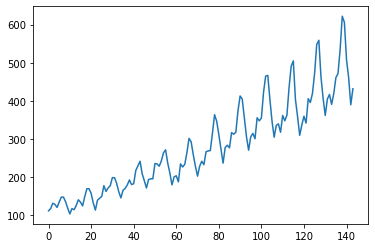

In [111]:
flights.passengers.plot()

In [112]:
np.random.randint(0,144,20)

array([ 64, 110,  57, 110, 137,  78,  71,  30,   2,  99,  93,  10,  92,
        38,  73,  89,  13, 136, 127,  28])

In [113]:
flights.loc[np.random.randint(0,144,20), 'passengers']= None

In [114]:
flights.isnull().sum()

year           0
month          0
passengers    18
dtype: int64

In [115]:
flights.sample(10)

,year,month,passengers
25,1951,Feb,150.0
141,1960,Oct,461.0
130,1959,Nov,NaN
16,1950,May,125.0
35,1951,Dec,166.0
115,1958,Aug,505.0
38,1952,Mar,193.0
32,1951,Sep,184.0
63,1954,Apr,227.0
80,1955,Sep,312.0


<AxesSubplot:>

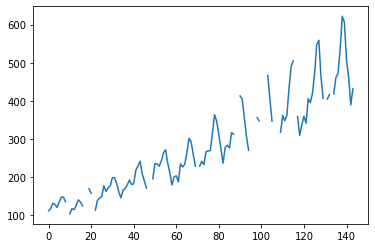

In [116]:

flights.passengers.plot()

In [117]:
import matplotlib.pyplot as plt

<AxesSubplot:>

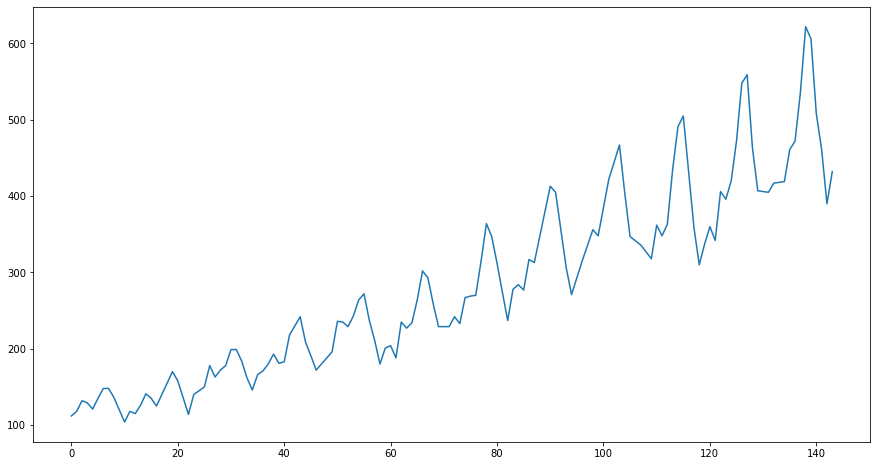

In [118]:
plt.figure(figsize = (15, 8))
flights["passengers"].interpolate().plot(kind="line")

<AxesSubplot:>

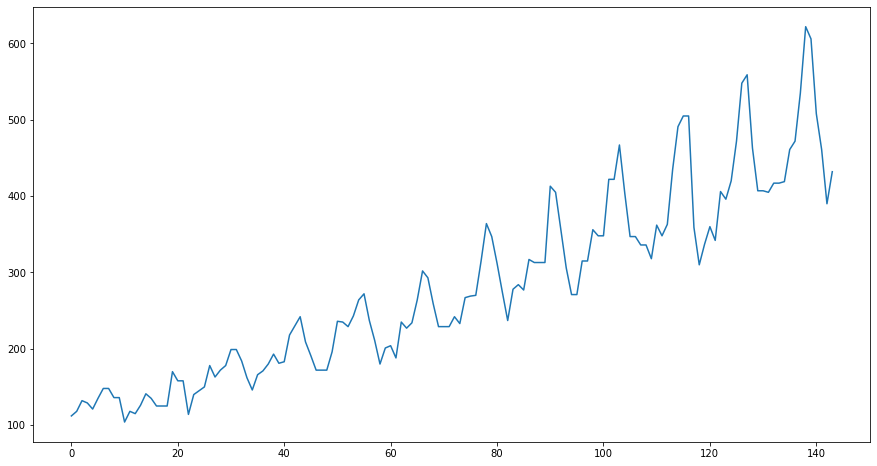

In [119]:
plt.figure(figsize = (15, 8))
flights["passengers"].fillna(method = "ffill").plot(kind="line")

Pandas dataframe.interpolate() function is basically used to fill NA values in the dataframe or series. But, this is a very powerful function to fill the missing values. It uses various interpolation technique to fill the missing values rather than hard-coding the value.

https://www.geeksforgeeks.org/python-pandas-dataframe-interpolate/

https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.interpolate.html

 # 2.Handling with Outliers

<b>Outliers</b> are unusual values in your dataset, and they can distort statistical analyses and violate their assumptions. ... Outliers increase the variability in your data, which decreases statistical power. Consequently, excluding outliers can cause your results to become statistically significant. Outliers can have a disproportionate effect on statistical results, such as the mean, which can result in misleading interpretations. In this case, the mean value makes it seem that the data values are higher than they really are

### Causes of Outliers

- Data entries errors
- FirstMeasurement errors or instrument errors
- Sampling errors
- Data processing error
- Natural novelties in data

### Guideline for Handling Outliers

- A measurement error or data entry error, correct the error if possible. If you can’t fix it, remove that observation because you know it’s incorrect.
- Not a part of the population you are studying (i.e., unusual properties or conditions), you can legitimately remove the outlier.
- A natural part of the population you are studying, you should not remove it.

## Catching and Detecting Outliers

In [120]:
sns.get_dataset_names()

['anagrams',
 'anscombe',
 'attention',
 'brain_networks',
 'car_crashes',
 'diamonds',
 'dots',
 'exercise',
 'flights',
 'fmri',
 'gammas',
 'geyser',
 'iris',
 'mpg',
 'penguins',
 'planets',
 'taxis',
 'tips',
 'titanic']

In [121]:
sns.load_dataset('diamonds')

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75
...,...,...,...,...,...,...,...,...,...,...
53935,0.72,Ideal,D,SI1,60.8,57.0,2757,5.75,5.76,3.50
53936,0.72,Good,D,SI1,63.1,55.0,2757,5.69,5.75,3.61
53937,0.70,Very Good,D,SI1,62.8,60.0,2757,5.66,5.68,3.56
53938,0.86,Premium,H,SI2,61.0,58.0,2757,6.15,6.12,3.74


In [122]:
import seaborn as sns

df = sns.load_dataset('diamonds')
df = df.select_dtypes(include = ['float64', 'int64']) 
df = df.dropna()
df

,carat,depth,table,price,x,y,z
0,0.23,61.5,55.0,326,3.95,3.98,2.43
1,0.21,59.8,61.0,326,3.89,3.84,2.31
2,0.23,56.9,65.0,327,4.05,4.07,2.31
3,0.29,62.4,58.0,334,4.20,4.23,2.63
4,0.31,63.3,58.0,335,4.34,4.35,2.75
...,...,...,...,...,...,...,...
53935,0.72,60.8,57.0,2757,5.75,5.76,3.50
53936,0.72,63.1,55.0,2757,5.69,5.75,3.61
53937,0.70,62.8,60.0,2757,5.66,5.68,3.56
53938,0.86,61.0,58.0,2757,6.15,6.12,3.74


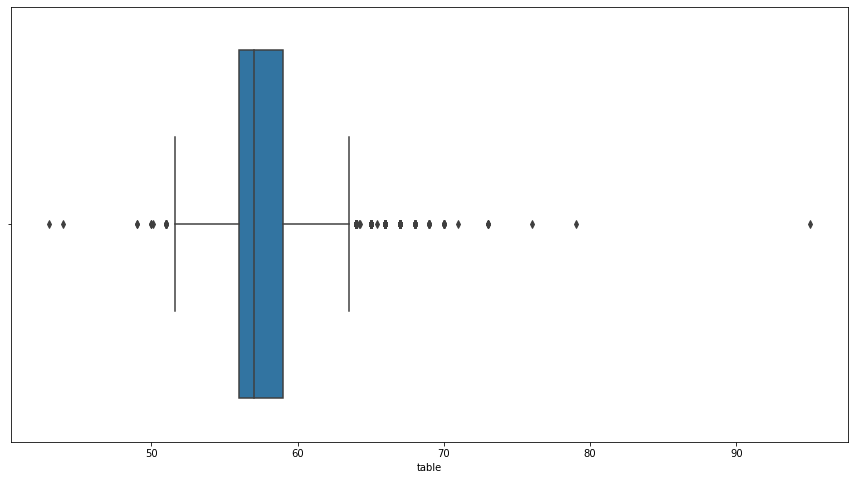

In [123]:
plt.figure(figsize=(15,8))         # tabloyu büyütüyor
sns.boxplot(x=df['table']);

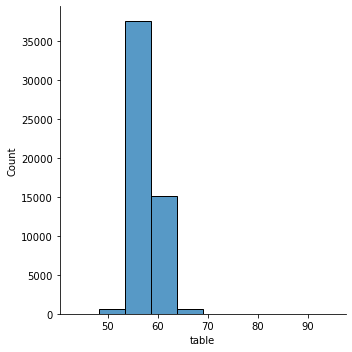

In [124]:
sns.displot(df.table, bins= 10, kde= False)         # displot seabornda histogram yerine kullaniliyor

### Graphs

### Tukey's Fences | Tukey's Rule

- First way of specifying ``Q1 & Q3`` is using the ``.quantile()`` method

In [125]:
Q1 = df['table'].quantile(0.25)
Q3 = df['table'].quantile(0.75)

In [126]:
IQR = Q3 - Q1
IQR

3.0

In [127]:
Q3

59.0

In [128]:
Q1

56.0

- Second way of specifying ``Q1 & Q3`` is using the ``.describe()`` method

In [129]:
df.describe()

,carat,depth,table,price,x,y,z
count,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000
mean,0.797940,61.749405,57.457184,3932.799722,5.731157,5.734526,3.538734
std,0.474011,1.432621,2.234491,3989.439738,1.121761,1.142135,0.705699
min,0.200000,43.000000,43.000000,326.000000,0.000000,0.000000,0.000000
25%,0.400000,61.000000,56.000000,950.000000,4.710000,4.720000,2.910000
50%,0.700000,61.800000,57.000000,2401.000000,5.700000,5.710000,3.530000
75%,1.040000,62.500000,59.000000,5324.250000,6.540000,6.540000,4.040000
max,5.010000,79.000000,95.000000,18823.000000,10.740000,58.900000,31.800000


In [130]:
df['table'].describe()

count    53940.000000
mean        57.457184
std          2.234491
min         43.000000
25%         56.000000
50%         57.000000
75%         59.000000
max         95.000000
Name: table, dtype: float64

In [131]:
lower_lim = Q1 - 1.5*IQR
upper_lim = Q3 + 1.5*IQR

In [132]:
lower_lim

51.5

In [133]:
upper_lim

63.5

In [134]:
(df.table > upper_lim).value_counts()

False    53351
True       589
Name: table, dtype: int64

In [135]:
(df.table < lower_lim).value_counts()

False    53924
True        16
Name: table, dtype: int64

In [136]:
df.table[(df.table > upper_lim) | (df.table < lower_lim)].count()

605

In [137]:
df.table[(df.table < upper_lim) & (df.table > lower_lim)].count()

53334

## Removing the Outliers

In [138]:


not_outliers = (df.table > lower_lim) & (df.table < upper_lim)
not_outliers 

0         True
1         True
2        False
3         True
4         True
         ...  
53935     True
53936     True
53937     True
53938     True
53939     True
Name: table, Length: 53940, dtype: bool

In [139]:
df[not_outliers]

,carat,depth,table,price,x,y,z
0,0.23,61.5,55.0,326,3.95,3.98,2.43
1,0.21,59.8,61.0,326,3.89,3.84,2.31
3,0.29,62.4,58.0,334,4.20,4.23,2.63
4,0.31,63.3,58.0,335,4.34,4.35,2.75
5,0.24,62.8,57.0,336,3.94,3.96,2.48
...,...,...,...,...,...,...,...
53935,0.72,60.8,57.0,2757,5.75,5.76,3.50
53936,0.72,63.1,55.0,2757,5.69,5.75,3.61
53937,0.70,62.8,60.0,2757,5.66,5.68,3.56
53938,0.86,61.0,58.0,2757,6.15,6.12,3.74


In [140]:
df[not_outliers][['table']]

,table
0,55.0
1,61.0
3,58.0
4,58.0
5,57.0
...,...
53935,57.0
53936,55.0
53937,60.0
53938,58.0


In [141]:
df.table[not_outliers].count()

53334

In [142]:
cleaned_df = df[not_outliers]
cleaned_df

,carat,depth,table,price,x,y,z
0,0.23,61.5,55.0,326,3.95,3.98,2.43
1,0.21,59.8,61.0,326,3.89,3.84,2.31
3,0.29,62.4,58.0,334,4.20,4.23,2.63
4,0.31,63.3,58.0,335,4.34,4.35,2.75
5,0.24,62.8,57.0,336,3.94,3.96,2.48
...,...,...,...,...,...,...,...
53935,0.72,60.8,57.0,2757,5.75,5.76,3.50
53936,0.72,63.1,55.0,2757,5.69,5.75,3.61
53937,0.70,62.8,60.0,2757,5.66,5.68,3.56
53938,0.86,61.0,58.0,2757,6.15,6.12,3.74


In [143]:
outlier_index = df.loc[(df.table > upper_lim) | (df.table < lower_lim)].index
outlier_index

Int64Index([    2,    91,   145,   219,   227,   239,   296,   314,   356,
              359,
            ...
            53226, 53503, 53542, 53577, 53660, 53695, 53697, 53756, 53757,
            53785],
           dtype='int64', length=605)

In [144]:
df.drop(outlier_index)

,carat,depth,table,price,x,y,z
0,0.23,61.5,55.0,326,3.95,3.98,2.43
1,0.21,59.8,61.0,326,3.89,3.84,2.31
3,0.29,62.4,58.0,334,4.20,4.23,2.63
4,0.31,63.3,58.0,335,4.34,4.35,2.75
5,0.24,62.8,57.0,336,3.94,3.96,2.48
...,...,...,...,...,...,...,...
53935,0.72,60.8,57.0,2757,5.75,5.76,3.50
53936,0.72,63.1,55.0,2757,5.69,5.75,3.61
53937,0.70,62.8,60.0,2757,5.66,5.68,3.56
53938,0.86,61.0,58.0,2757,6.15,6.12,3.74


<AxesSubplot:xlabel='table'>

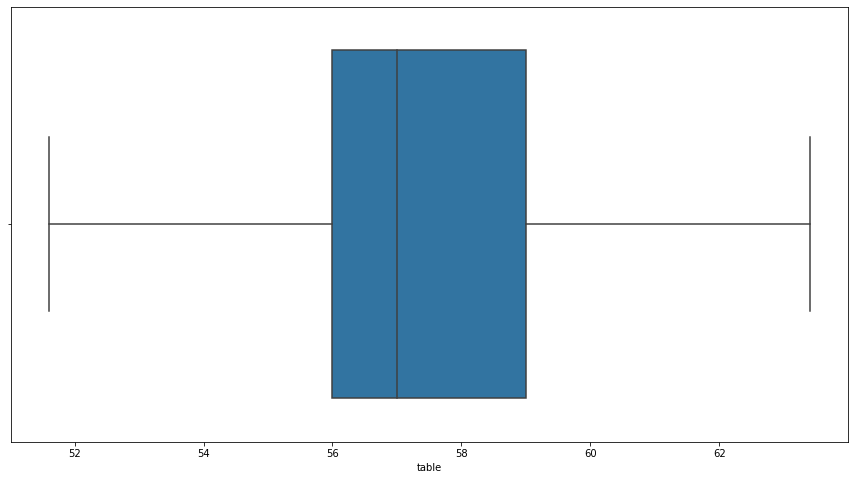

In [145]:
plt.figure(figsize=(15,8)) 
sns.boxplot(x= cleaned_df.table )

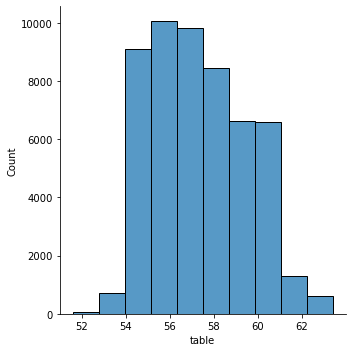

In [146]:
sns.displot(cleaned_df.table, bins= 10 , kde = False)

## Limitation and Transformation of the Outliers

### Limitation using ``.winsorize()`` method

In [147]:
from scipy.stats.mstats import winsorize            

In [148]:
df

,carat,depth,table,price,x,y,z
0,0.23,61.5,55.0,326,3.95,3.98,2.43
1,0.21,59.8,61.0,326,3.89,3.84,2.31
2,0.23,56.9,65.0,327,4.05,4.07,2.31
3,0.29,62.4,58.0,334,4.20,4.23,2.63
4,0.31,63.3,58.0,335,4.34,4.35,2.75
...,...,...,...,...,...,...,...
53935,0.72,60.8,57.0,2757,5.75,5.76,3.50
53936,0.72,63.1,55.0,2757,5.69,5.75,3.61
53937,0.70,62.8,60.0,2757,5.66,5.68,3.56
53938,0.86,61.0,58.0,2757,6.15,6.12,3.74


In [149]:
winsorize(df.table, (0.02, 0.05))

masked_array(data=[55., 61., 61., ..., 60., 58., 55.],
             mask=False,
       fill_value=1e+20)

In [150]:
a = len(df.table[df.table<lower_lim])/len(df)
a

0.00029662588060808305

In [151]:
b = len(df.table[df.table> upper_lim])/len(df)
b

0.010919540229885057

In [152]:
table_win = winsorize(df.table, (a, b))
table_win

masked_array(data=[55. , 61. , 63.5, ..., 60. , 58. , 55. ],
             mask=False,
       fill_value=1e+20)

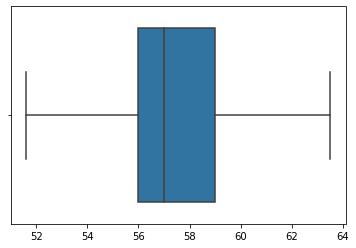

In [153]:
sns.boxplot( x= table_win);

With winsorizing, any value of a variable above or below a percentile k on each side of the variables’ distribution is replaced with the value of the k-th percentile itself. For example, if k=5, all observations above the 95th percentile are recoded to the value of the 95th percentile, and values below the 5th percent are recoded, respectively.

https://towardsdatascience.com/detecting-and-treating-outliers-in-python-part-3-dcb54abaf7b0

https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.mstats.winsorize.html

In [154]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 53940 entries, 0 to 53939
Data columns (total 7 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   carat   53940 non-null  float64
 1   depth   53940 non-null  float64
 2   table   53940 non-null  float64
 3   price   53940 non-null  int64  
 4   x       53940 non-null  float64
 5   y       53940 non-null  float64
 6   z       53940 non-null  float64
dtypes: float64(6), int64(1)
memory usage: 5.3 MB


In many circumstances, datasets can be incomplete or tainted by the presence of invalid data. For example, a sensor may have failed to record a data, or recorded an invalid value. The numpy.ma module provides a convenient way to address this issue, by introducing masked arrays.Masked arrays are arrays that may have missing or invalid entries.

https://numpy.org/doc/stable/reference/maskedarray.generic.html#:~:text=A%20masked%20array%20is%20the%20combination%20of%20a%20standard%20numpy.&text=When%20an%20element%20of%20the,to%20be%20masked%20(invalid).

https://www.geeksforgeeks.org/numpy-maskedarray-any-function-python/

### ``log()`` Transformation

In [155]:
df.carat

0        0.23
1        0.21
2        0.23
3        0.29
4        0.31
         ... 
53935    0.72
53936    0.72
53937    0.70
53938    0.86
53939    0.75
Name: carat, Length: 53940, dtype: float64

<AxesSubplot:xlabel='carat'>

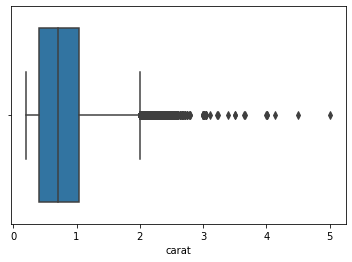

In [156]:
sns.boxplot(x= df.carat)

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='carat', ylabel='Density'>

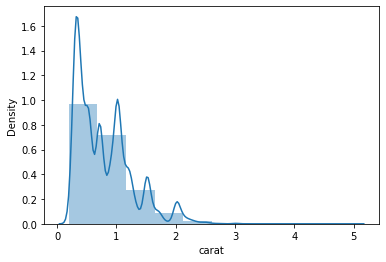

In [157]:
sns.distplot(df.carat, bins= 10, kde= True)

In [159]:
df

,carat,depth,table,price,x,y,z
0,0.23,61.5,55.0,326,3.95,3.98,2.43
1,0.21,59.8,61.0,326,3.89,3.84,2.31
2,0.23,56.9,65.0,327,4.05,4.07,2.31
3,0.29,62.4,58.0,334,4.20,4.23,2.63
4,0.31,63.3,58.0,335,4.34,4.35,2.75
...,...,...,...,...,...,...,...
53935,0.72,60.8,57.0,2757,5.75,5.76,3.50
53936,0.72,63.1,55.0,2757,5.69,5.75,3.61
53937,0.70,62.8,60.0,2757,5.66,5.68,3.56
53938,0.86,61.0,58.0,2757,6.15,6.12,3.74


In [158]:
np.log(df.carat)

0       -1.469676
1       -1.560648
2       -1.469676
3       -1.237874
4       -1.171183
           ...   
53935   -0.328504
53936   -0.328504
53937   -0.356675
53938   -0.150823
53939   -0.287682
Name: carat, Length: 53940, dtype: float64

<AxesSubplot:xlabel='carat'>

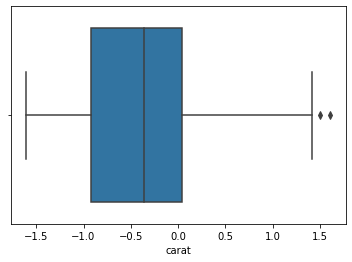

In [160]:
sns.boxplot(x= np.log(df.carat))

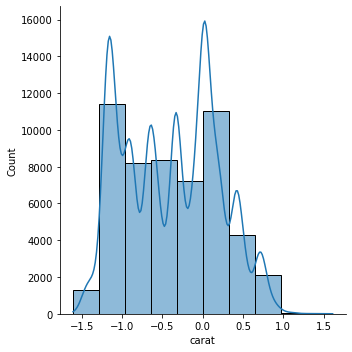

In [161]:
sns.displot(np.log(df.carat), bins= 10 , kde= True)

In [162]:
df['carat_logged']=np.log(df.carat)
df

,carat,depth,table,price,x,y,z,carat_logged
0,0.23,61.5,55.0,326,3.95,3.98,2.43,-1.469676
1,0.21,59.8,61.0,326,3.89,3.84,2.31,-1.560648
2,0.23,56.9,65.0,327,4.05,4.07,2.31,-1.469676
3,0.29,62.4,58.0,334,4.20,4.23,2.63,-1.237874
4,0.31,63.3,58.0,335,4.34,4.35,2.75,-1.171183
...,...,...,...,...,...,...,...,...
53935,0.72,60.8,57.0,2757,5.75,5.76,3.50,-0.328504
53936,0.72,63.1,55.0,2757,5.69,5.75,3.61,-0.328504
53937,0.70,62.8,60.0,2757,5.66,5.68,3.56,-0.356675
53938,0.86,61.0,58.0,2757,6.15,6.12,3.74,-0.150823


The Numpy.log() method lets you calculate the mathematical log of any number or array.
The numpy.log() is a mathematical function that helps user to calculate Natural logarithm of x where x belongs to all the input array elements.

The natural logarithm log is the inverse of the exponential function, so that log(exp(x)) = x. The natural logarithm is logarithm in base e.

https://www.geeksforgeeks.org/numpy-log-python/#:~:text=The%20numpy.,is%20log%20in%20base%20e.

https://numpy.org/doc/stable/reference/generated/numpy.log.html

### removing after log transformation